# Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import datetime
import sklearn.metrics
import keras
import keras.models
import keras.layers
import keras.preprocessing.image
import keras_tqdm

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# Data preparation

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 8 - Deep Learning/Section 40 - Convolutional Neural Networks (CNN)/'
data_dir=work_dir+'dataset/'

In [3]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(
        data_dir+'training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
        data_dir+'test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Convolutional Neural Networks

## Initialize the network

In [4]:
classifier=keras.models.Sequential()

## Convolution (including relu)

In [5]:
classifier.add(keras.layers.Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

## Pooling (max pooling)

In [6]:
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

## Flattening

In [7]:
classifier.add(keras.layers.Flatten())

## Hidden layers

In [8]:
classifier.add(keras.layers.Dense(units=128,
                                  kernel_initializer='uniform',
                                  activation='relu'))
classifier.add(keras.layers.Dense(units=1,
                                  kernel_initializer='uniform',
                                  activation='sigmoid'))

## Network structure

In [9]:
classifier.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 64, 64, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Flatten', 'config': {'name': 'flatten_1', 'trainable': Tru

## Compile the network

In [45]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train the network

In [ ]:
# class TimesHistory(keras.callbacks.Callback):
#     def on_train_begin(self,logs={}):
#         self.timestamps=[datetime.datetime.now()]
#     def on_epoch_end(self, batch, logs={}):
#         self.timestamps.append(datetime.datetime.now())
# times_history=TimesHistory()
        
times=[]
classifier.fit_generator(
        train_generator,
        steps_per_epoch=8000,
        epochs=1,
        validation_data=test_generator,
        validation_steps=2000,
    verbose=0,
    callbacks=[
#         times_history,
        keras_tqdm.TQDMNotebookCallback(),
        keras.callbacks.LambdaCallback(
            on_train_begin=lambda logs: times.append(datetime.datetime.now()),
            on_epoch_end=lambda epoch,logs: times.append(datetime.datetime.now()))])

## Results

In [96]:
print(datetime.timedelta(seconds=(times[-1]-times[0]).seconds))

0:00:21


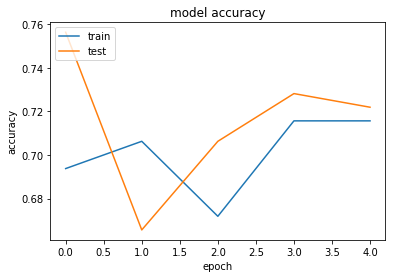

In [76]:
plt.plot(training_repot.history['acc'])
plt.plot(training_repot.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

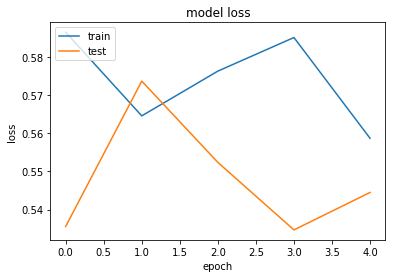

In [77]:
plt.plot(training_repot.history['loss'])
plt.plot(training_repot.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 2 convolution layers

In [3]:
classifier=keras.models.Sequential()
classifier.add(keras.layers.Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Convolution2D(32,(3,3),activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Flatten())
classifier.add(keras.layers.Dense(units=128,
                                  kernel_initializer='uniform',
                                  activation='relu'))
classifier.add(keras.layers.Dense(units=1,
                                  kernel_initializer='uniform',
                                  activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
times=[]
classifier.fit_generator(
        train_generator,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_generator,
        validation_steps=2000,
    verbose=0,
    callbacks=[
        keras_tqdm.TQDMNotebookCallback(),
        keras.callbacks.LambdaCallback(
            on_train_begin=lambda logs: times.append(datetime.datetime.now()),
            on_epoch_end=lambda epoch,logs: times.append(datetime.datetime.now()))])

## Results

In [96]:
print(datetime.timedelta(seconds=(times[-1]-times[0]).seconds))

0:00:21


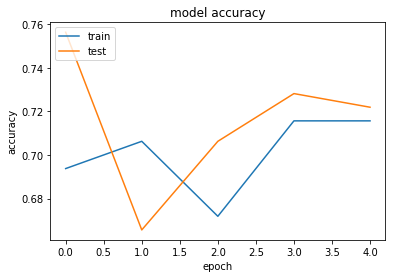

In [76]:
plt.plot(training_repot.history['acc'])
plt.plot(training_repot.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

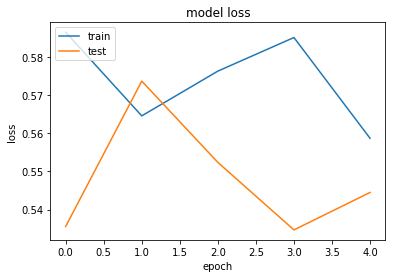

In [77]:
plt.plot(training_repot.history['loss'])
plt.plot(training_repot.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 2 hidden layers

In [3]:
classifier=keras.models.Sequential()
classifier.add(keras.layers.Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Convolution2D(32,(3,3),activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Flatten())
classifier.add(keras.layers.Dense(units=128,
                                  kernel_initializer='uniform',
                                  activation='relu'))
classifier.add(keras.layers.Dense(units=128,
                                  kernel_initializer='uniform',
                                  activation='relu'))
classifier.add(keras.layers.Dense(units=1,
                                  kernel_initializer='uniform',
                                  activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
times=[]
classifier.fit_generator(
        train_generator,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_generator,
        validation_steps=2000,
    verbose=0,
    callbacks=[
        keras_tqdm.TQDMNotebookCallback(),
        keras.callbacks.LambdaCallback(
            on_train_begin=lambda logs: times.append(datetime.datetime.now()),
            on_epoch_end=lambda epoch,logs: times.append(datetime.datetime.now()))])

## Results

In [96]:
print(datetime.timedelta(seconds=(times[-1]-times[0]).seconds))

0:00:21


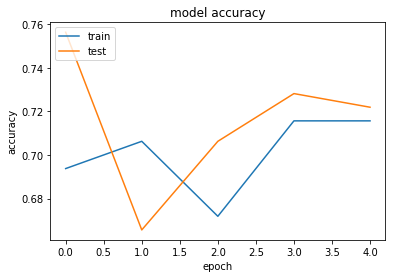

In [76]:
plt.plot(training_repot.history['acc'])
plt.plot(training_repot.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

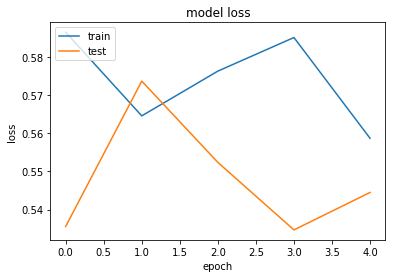

In [77]:
plt.plot(training_repot.history['loss'])
plt.plot(training_repot.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()